# Predictive Models for book ratings

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import LinearRegression, Lasso, LarsCV, Ridge, RidgeCV, LassoCV, HuberRegressor, ElasticNet, Lars, TheilSenRegressor, BayesianRidge


In [18]:
d = pd.read_csv("transformed_clean_data.csv")
d.loc[:, 'fans_count_log'] = d.fans_count.apply(np.log1p)
d = d.drop('fans_count', axis=1)


In [282]:
d2 = d[(d.average_rating != 5) & (d.average_rating != 2.5) & (d.average_rating != 3) & (d.fans_count_log != 0) & (d.pagesNo_log102 != 0.5)]

In [7]:
def corrfunc(x, y, **kws):
    x_1 = x[~(np.isnan(x) | np.isnan(y))]
    y_1 = y[~(np.isnan(x) | np.isnan(y))]
    r, _ = stats.pearsonr(x_1, y_1)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)



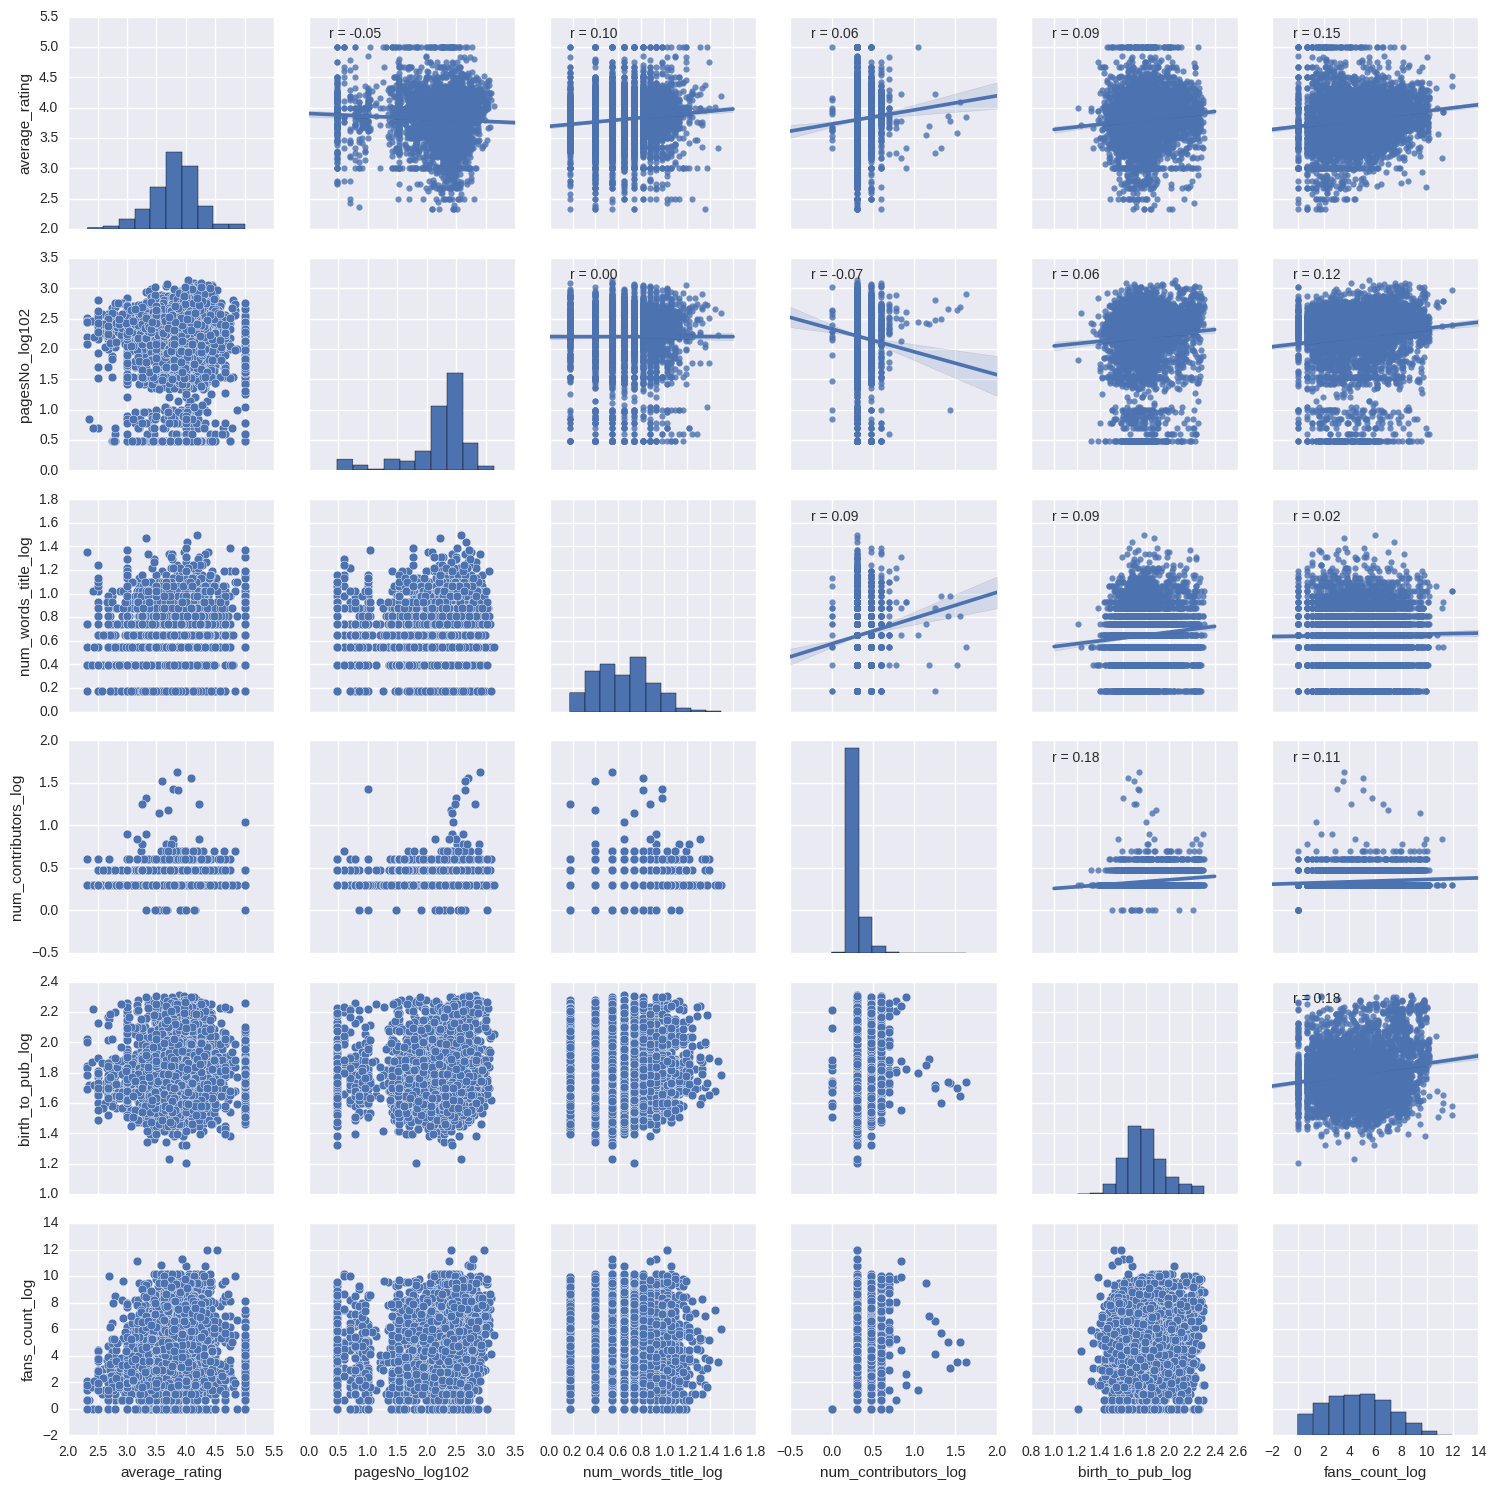

In [20]:
g = sns.PairGrid(d[['average_rating', 'pagesNo_log102', 'num_words_title_log', 'num_contributors_log',  'birth_to_pub_log', 'fans_count_log']])
g = g.map_upper(sns.regplot)
g = g.map_upper(corrfunc)
g = g.map_diag(plt.hist)
g = g.map_lower(plt.scatter, edgecolor="w", s=40)

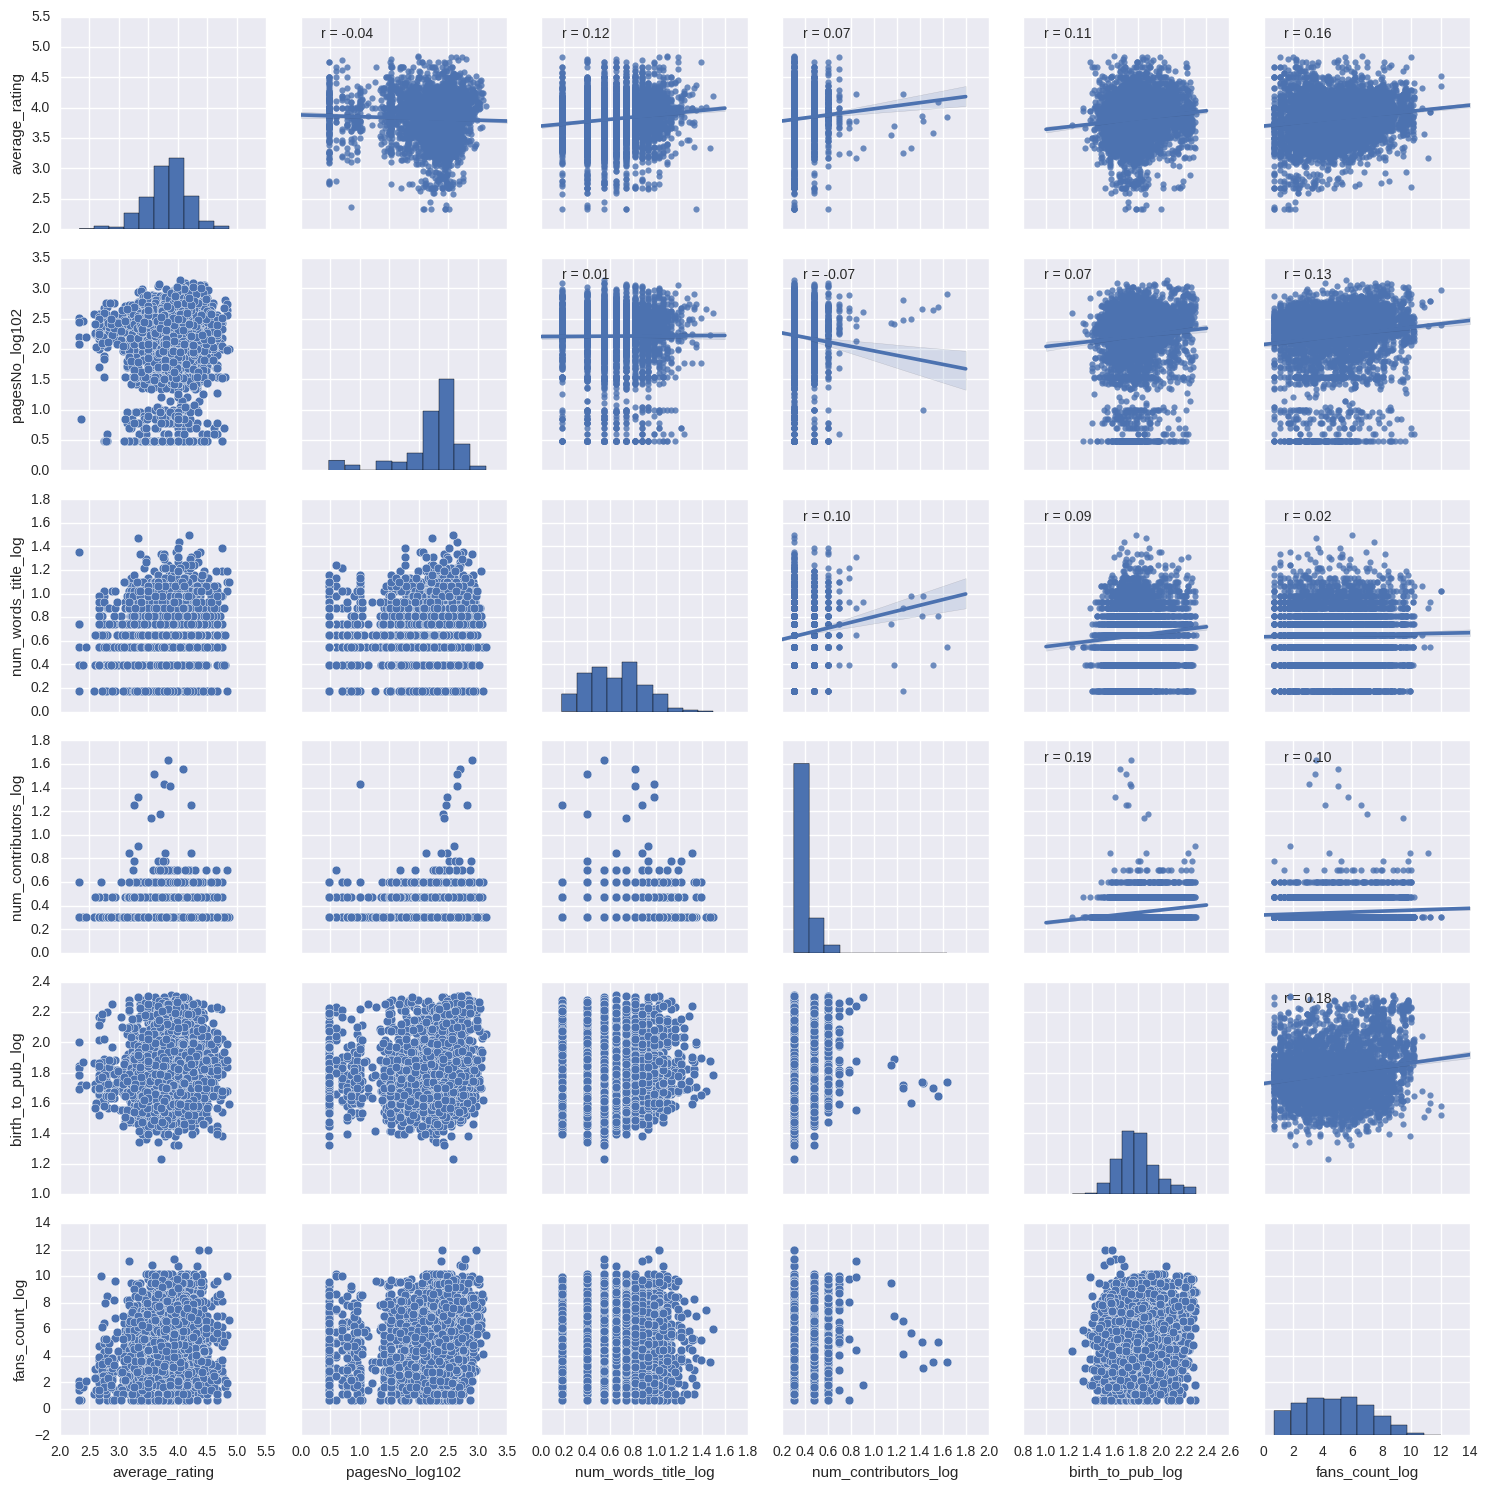

In [283]:
g = sns.PairGrid(d2[['average_rating', 'pagesNo_log102', 'num_words_title_log', 'num_contributors_log',  'birth_to_pub_log', 'fans_count_log']])
g = g.map_upper(sns.regplot)
g = g.map_upper(corrfunc)
g = g.map_diag(plt.hist)
g = g.map_lower(plt.scatter, edgecolor="w", s=40)

In [335]:
def evaluateEstimator(estimator):
    estimator.fit(x_t_lr, y_lrn)
    plt.hlines(y = 0, xmin=min(min(estimator.predict(x_t_lr)), min(estimator.predict(x_t_tst))), 
               xmax = max(max(estimator.predict(x_t_lr)), max(estimator.predict(x_t_tst))));
    plt.scatter(estimator.predict(x_t_lr), estimator.predict(x_t_lr) - y_lrn, c='r', s=30)
    plt.scatter(estimator.predict(x_t_tst),
                estimator.predict(x_t_tst).ravel() - y_tst.ravel(), c='g', s=40, alpha=0.5)
    
    
    print('MSE is: ', np.mean((estimator.predict(x_t_tst).ravel() - y_tst.ravel())**2) )
    plt.title('Residual Plot using  test (green) data');
    plt.ylabel('Residuals');

In [261]:
x_t_lr, x_t_tst, y_lrn, y_tst = train_test_split(d[~d.work_count_log.isnull()][['IsPoetry', 'IsDrama', 'IsEssay', 'IsFiction', 'IsCollection', 'pagesNo_log102', 'num_words_title_log', 'num_contributors_log',  'birth_to_pub_log', 'fans_count_log', 'IsIllustrated']].values, 
                                                 d[~d.work_count_log.isnull()].average_rating.values, random_state=10)
#'IsPoetry', 'IsDrama', 'IsEssay','IsCollection', , 'IsIllustrated' ,'num_contributors_log',  'birth_to_pub_log', 'num_words_title_log', 'pagesNo_log102', 

In [278]:
x_t_lr, x_t_tst, y_lrn, y_tst = train_test_split(d2[~d2.work_count_log.isnull()][['IsFiction', 'pagesNo_log102', 'num_words_title_log', 'num_contributors_log',  'birth_to_pub_log', 'fans_count_log', 'IsIllustrated']].values, 
                                                 d2[~d2.work_count_log.isnull()].average_rating.values, random_state=10)

In [31]:
d.columns

Index(['Unnamed: 0', 'dewey_parsed', 'average_rating', 'Genres', 'IsPoetry',
       'IsDrama', 'IsEssay', 'IsFiction', 'IsCollection', 'isbn', 'Gender',
       'pagesNo', 'first_isbn', 'title', 'num_words_title', 'num_contributors',
       'publication_year', 'birth_year', 'birth_to_pub_interval',
       'pages_no_group', 'num_contributors_log', 'work_count',
       'work_count_log', 'num_words_title_log', 'pagesNo_log102',
       'birth_to_pub_log', 'IsIllustrated', 'fans_count_log'],
      dtype='object')

In [318]:
len(x_t_lr), len(x_t_tst)

(3282, 1095)

## Linear regression methods
### Ordinary Least Squares regression

In [ ]:
lm = LinearRegression()
evaluateEstimator(lm)

In [60]:
lm.score(x_t_lr, y_lrn)

0.081872131517073288

In [302]:
lm.score(x_t_lr, y_lrn)

0.089231664228745178

MSE is:  0.110773130021


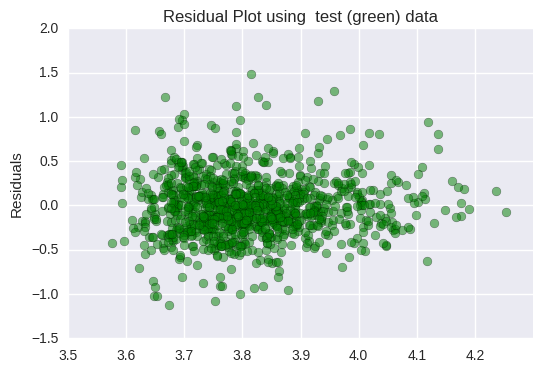

In [267]:
evaluateEstimator(lm)

MSE is:  0.15101687319


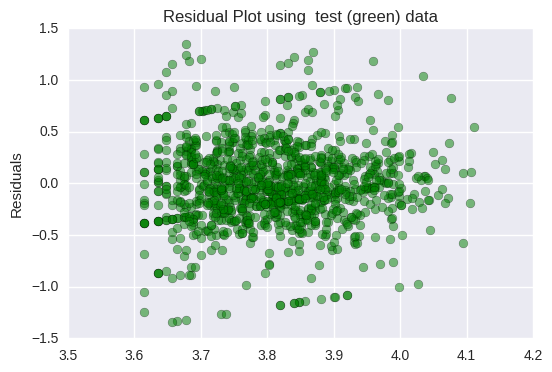

In [258]:
evaluateEstimator(lm)

MSE is:  0.109929929305


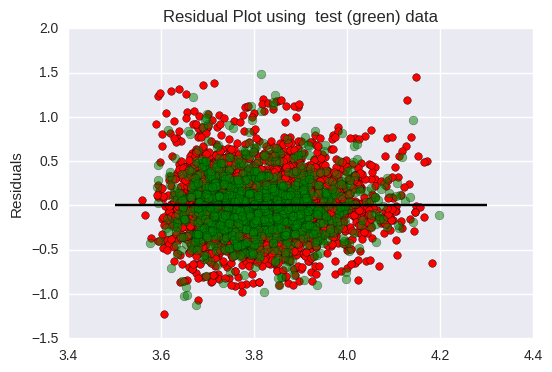

In [293]:
evaluateEstimator(lm)

In [301]:
lm.intercept_, lm.coef_

(3.4714910820058074,
 array([-0.16498786,  0.01071841,  0.14019282,  0.03287578,  0.11282847,
         0.02797398, -0.03201951]))

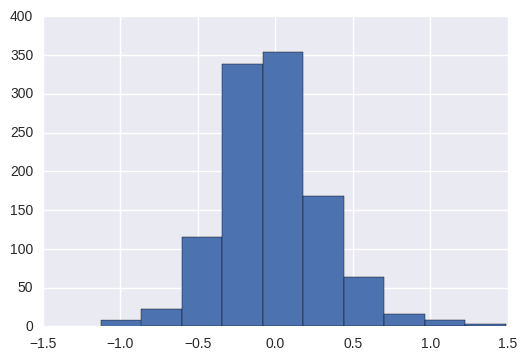

In [286]:
plt.hist(lm.predict(x_t_tst) - y_tst);

In [344]:
np.std(lm.predict(x_t_tst) - y_tst)

0.33126327399012589

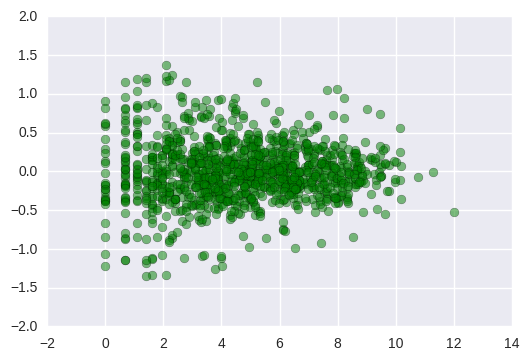

In [244]:
plt.scatter(x_t_tst[:, 5],
                lm.predict(x_t_tst).ravel() -  y_tst.ravel(), c='g', s=40, alpha=0.5)

In [225]:
x_t_tst[:,0]

array([ 0.,  0.,  1., ...,  1.,  1.,  0.])

In [ ]:
l

### Ridge Regression

MSE is:  0.109929962074


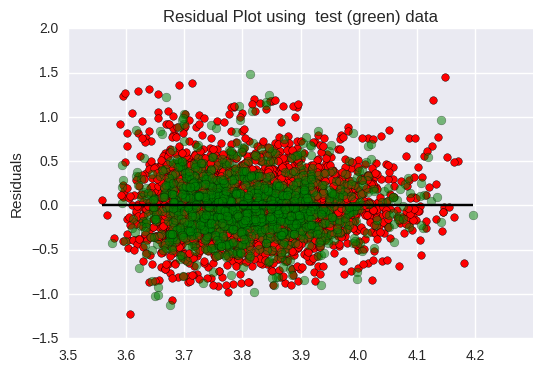

In [367]:
ridgeRegr = Ridge(alpha=1)
evaluateEstimator(ridgeRegr)

In [272]:
print("R-squared: ", ridgeRegr.score(x_t_lr, y_lrn))

R-squared:  0.102662530838


In [319]:
ridgeRegr.intercept_, ridgeRegr.coef_

(3.4926011914689599,
 array([-0.16284279,  0.01035364,  0.13438379,  0.02738745,  0.1034989 ,
         0.02804848, -0.02733598]))

MSE is:  0.11050646804


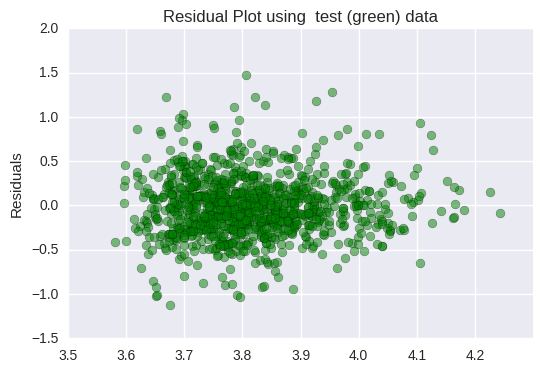

In [268]:
evaluateEstimator(ridgeRegr)

MSE is:  0.109937057028


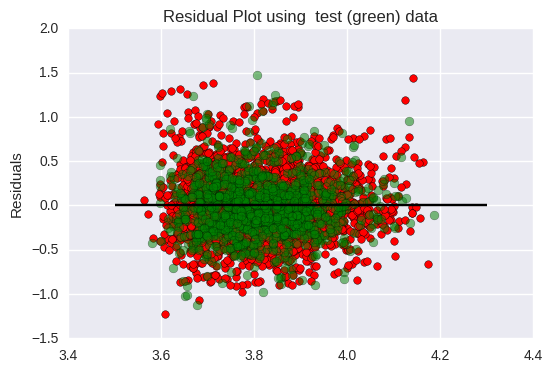

In [300]:
evaluateEstimator(ridgeRegr)

### ElasticNet regressor

MSE is:  0.161474451863


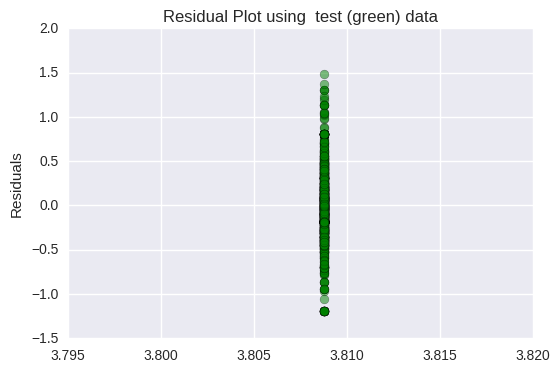

In [62]:
en = ElasticNet()
evaluateEstimator(en)

MSE is:  0.120599511788


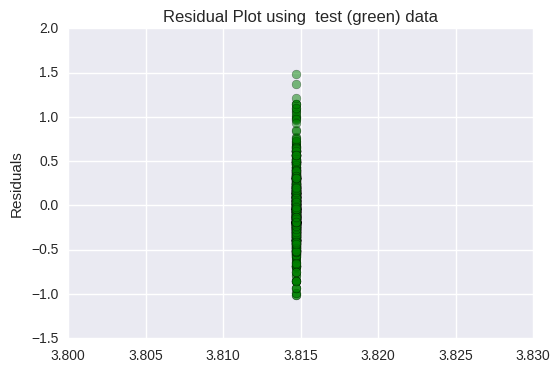

In [269]:
evaluateEstimator(en)

### Bayesian Ridge Regressor

MSE is:  0.148824880978


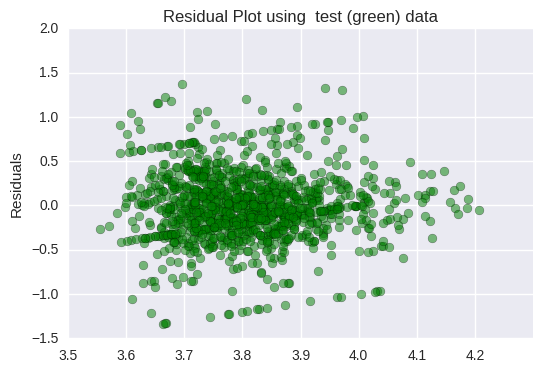

In [64]:
br = BayesianRidge()
evaluateEstimator(br)

In [65]:
br.score(x_t_lr, y_lrn)

0.081622376916911987

MSE is:  0.109941150687


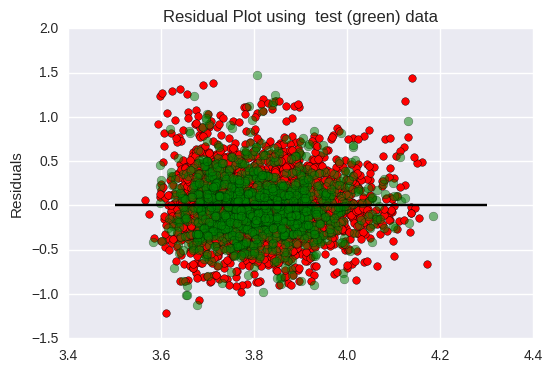

In [303]:
evaluateEstimator(br)

In [304]:
br.intercept_, br.coef_

(3.4976247226958836,
 array([-0.16226192,  0.01024312,  0.13290068,  0.02634893,  0.10127145,
         0.02806423, -0.02631657]))

### Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression

In [81]:
y_lrn_2, y_tst_2 = [str(np.round(y)) for y in y_lrn], [str(np.round(y)) for y in y_tst]

In [83]:
lr = LogisticRegression()
lr.fit(x_t_lr, y_lrn_2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [84]:
lr.score(x_t_tst, y_tst_2)

0.78117048346055984

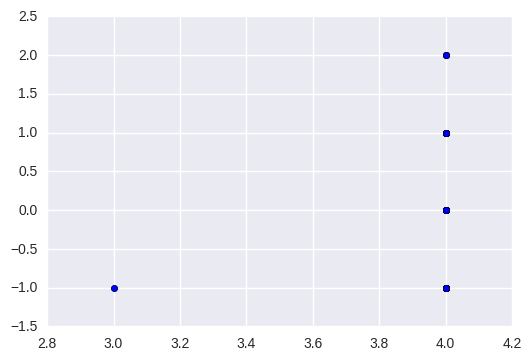

In [93]:
plt.scatter([float(i) for i in lr.predict(x_t_tst)], 
            np.array([float(i) for i in lr.predict(x_t_tst)]) - np.array([float(i) for i in y_tst_2]) )

### Logistic regression with a different Binning

In [149]:
def biny(yvalue):
    if yvalue >= 4.5:
        return '4.5'
    elif yvalue >= 4.:
        return '4.'
    elif yvalue >= 3.5:
        return '3.5'
    elif yvalue >= 3.:
        return '3.'
    elif yvalue >= 2.5:
        return '2.5'
    return '2.'

In [158]:
y_lrn_3, y_tst_3 = [biny(y) for y in y_lrn], [biny(y) for y in y_tst]

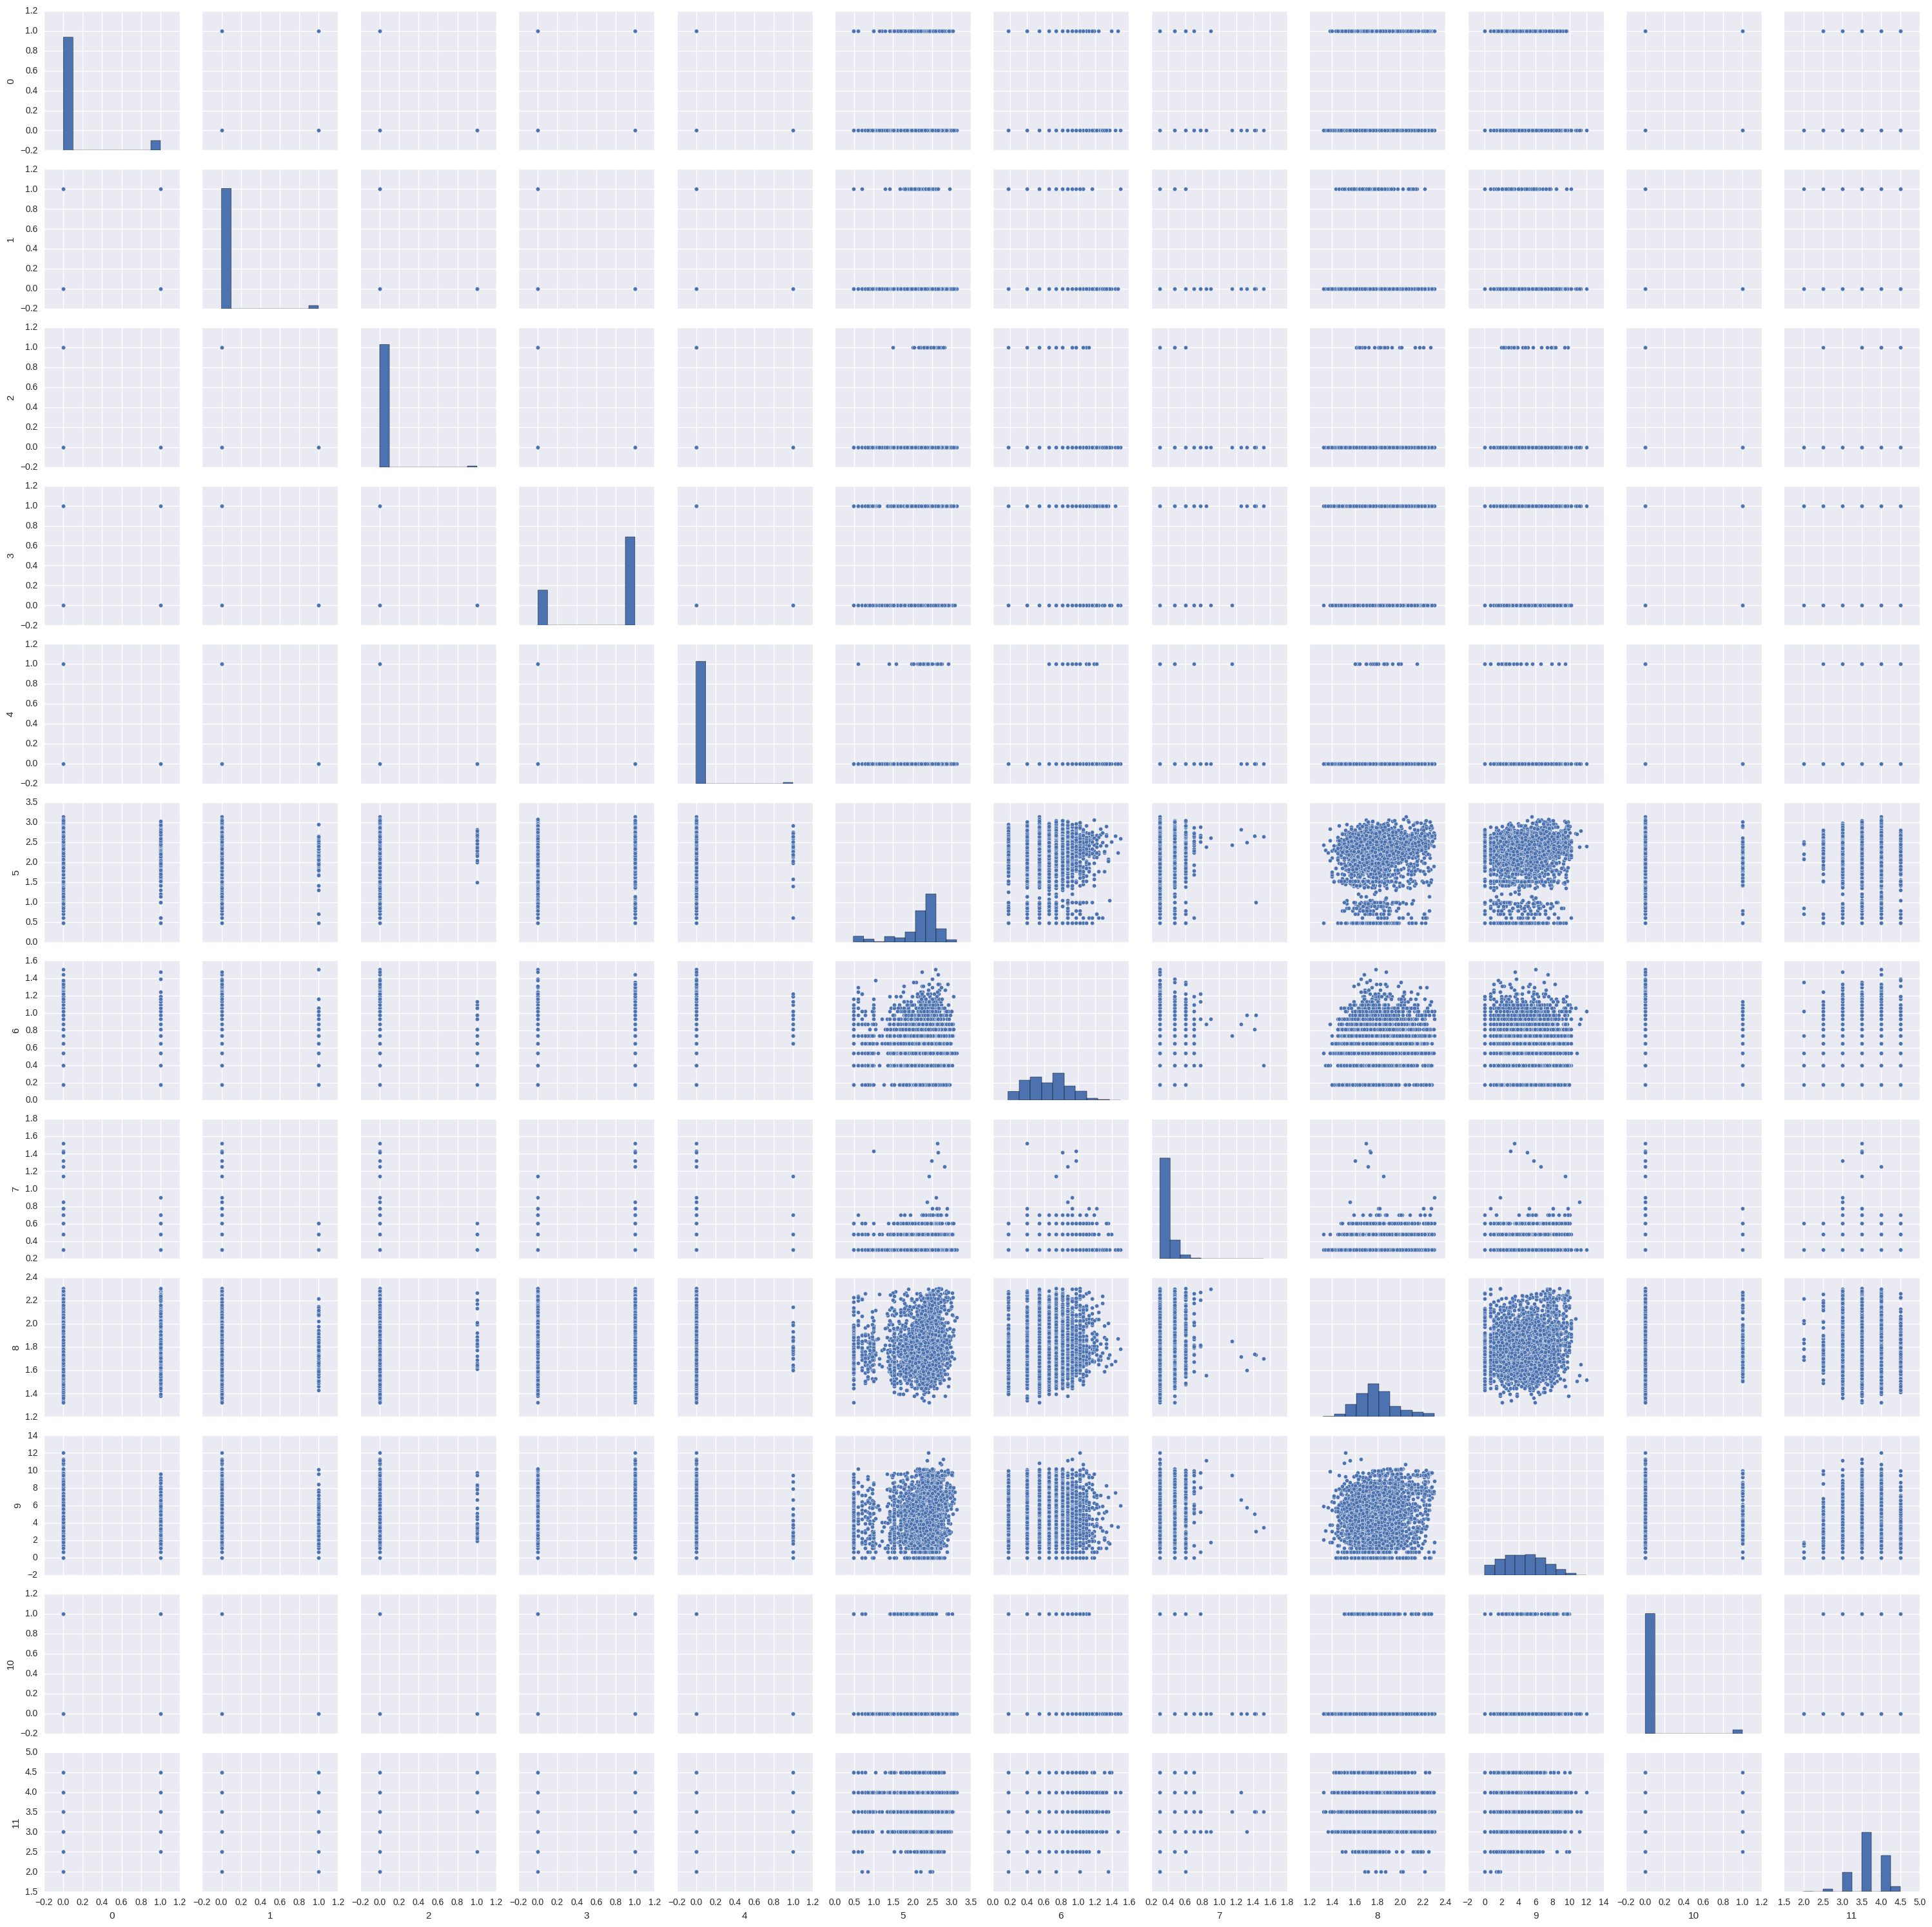

In [188]:
sns.pairplot(pd.DataFrame(np.hstack((x_t_lr, y_temp))) )
#y_temp = np.reshape(np.array([float(y) for y in y_lrn_3]), (3536, 1) )
#np.hstack((x_t_lr, y_temp))
#x_t_lr.shape,  y_temp.shape

In [159]:
lr2 = LogisticRegression()
lr2.fit(x_t_lr, y_lrn_3)
lr.score(x_t_tst, y_tst_3)

0.0

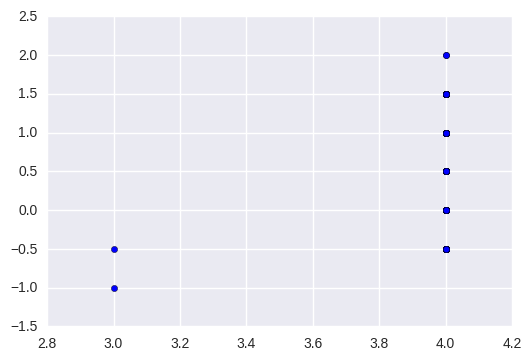

In [160]:
plt.scatter([float(i) for i in lr.predict(x_t_tst)], 
            np.array([float(i) for i in lr.predict(x_t_tst)]) - np.array([float(i) for i in y_tst_3]) )

### Neural Network

In [94]:
from sklearn import neural_network

MSE is:  0.111150343293


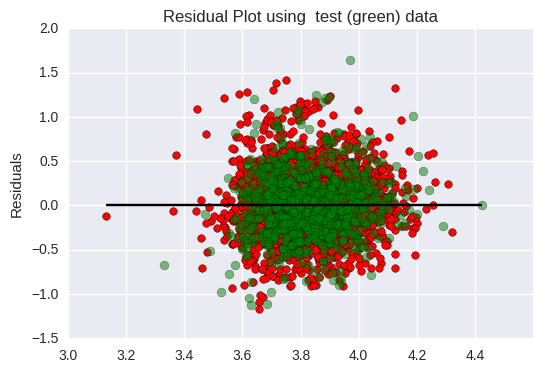

In [342]:
nn = neural_network.MLPRegressor(hidden_layer_sizes=(250, 250), activation='relu')
evaluateEstimator(nn)

In [343]:
nn.score(x_t_tst, y_tst)

0.07708928121621883

In [110]:
x_t_lr.shape

(3536, 11)

In [189]:
from sklearn.svm import LinearSVR

MSE is:  0.110513458969


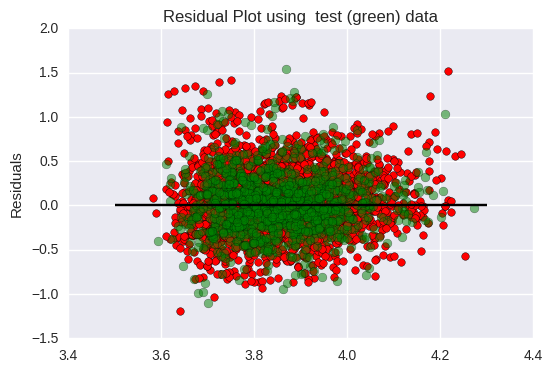

In [307]:
linSVR = LinearSVR()
evaluateEstimator(linSVR)

MSE is:  0.110138139205


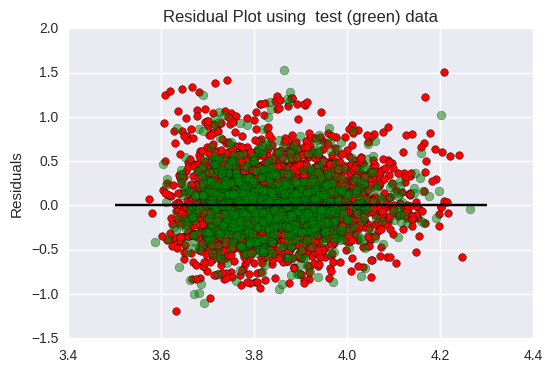

In [316]:
evaluateEstimator(linSVR)

In [320]:
linSVR.intercept_, linSVR.coef_

(array([ 3.41510715]),
 array([-0.16775741,  0.01676691,  0.14659649,  0.07880526,  0.1422118 ,
         0.02866944, -0.02142461]))

MSE is:  0.196666260653


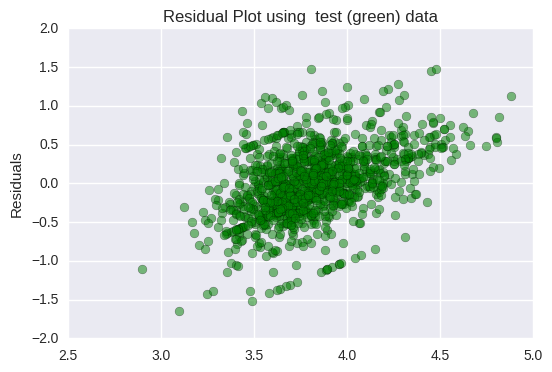

In [191]:
from sklearn.linear_model import SGDRegressor
sgdr = SGDRegressor()
evaluateEstimator(sgdr)

MSE is:  0.182349340404


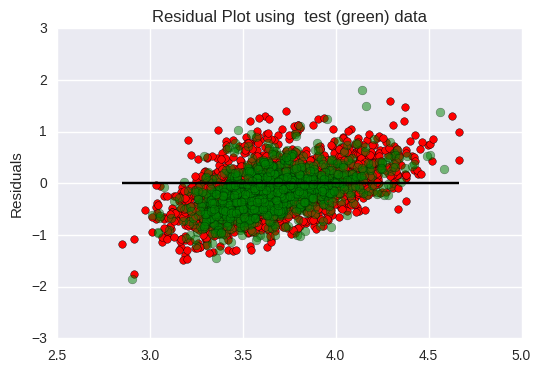

In [346]:
evaluateEstimator(sgdr)

In [192]:
from sklearn.decomposition import PCA

In [311]:
pca = PCA(n_components=3)
pca.fit(x_t_lr)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [312]:
pca.explained_variance_ratio_.cumsum()

array([ 0.9016345 ,  0.95495019,  0.97935336])

MSE is:  0.11045186862


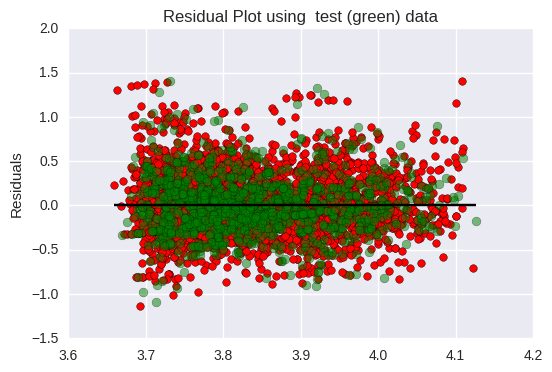

In [347]:
from sklearn.pipeline import Pipeline
pipe = Pipeline(steps=[('reduce', pca), ('linSVR', linSVR)])

evaluateEstimator(pipe)

In [382]:
from xgboost import XGBRegressor, plot_importance, plot_tree

MSE is:  0.108344234879


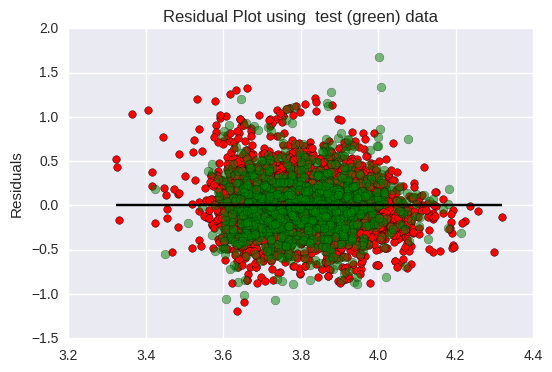

In [345]:
xgb = XGBRegressor()
evaluateEstimator(xgb)

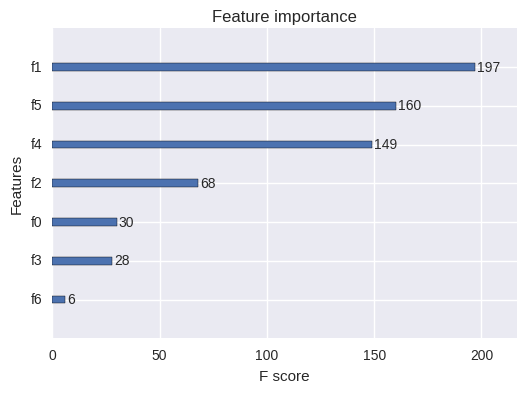

In [350]:
plot_importance(xgb);

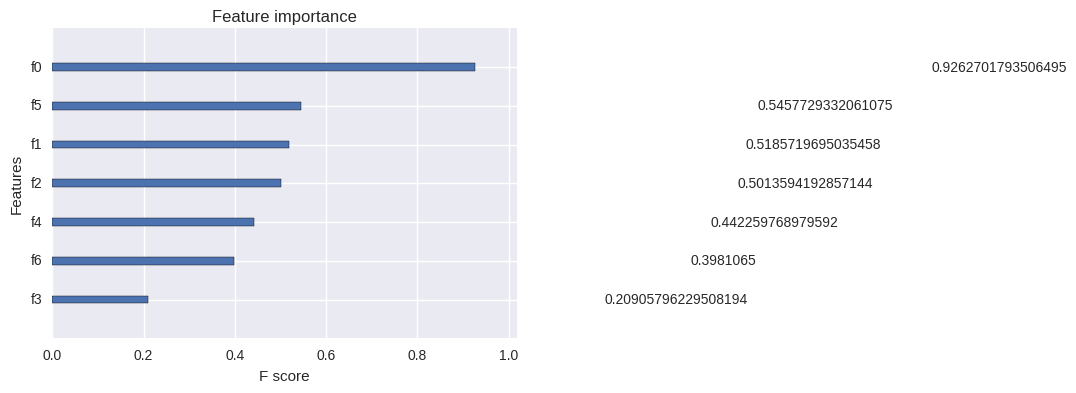

In [373]:
plot_importance(xgb2, importance_type='gain')

AttributeError: 'XGBRegressor' object has no attribute 'features_importances_'

In [376]:
from scipy.stats import chi2, chisquare

In [380]:
chi2([1, 2, 3, 4, 5, 6], [1, 2, 3, 4, 5, 6])

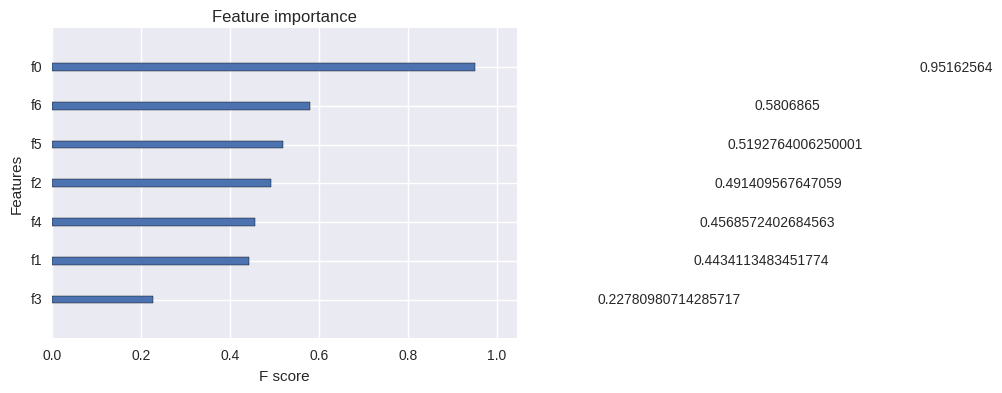

In [375]:
plot_importance(xgb, importance_type='gain')

In [351]:
from sklearn.model_selection import GridSearchCV

In [361]:
max_depths = [2, 3, 4]
learning_rates = [0.04, 0.05, 0.07]
estims = [190, 200, 210]
gammas = [0, 0.01, 0.05]
colsamples_bytree= [0.85, 0.9, 0.95]
reg_lambdas = [9.0, 10.0, 15.0]

parameters = {'max_depth':max_depths, 'learning_rate':learning_rates, 'n_estimators':estims, 
              'gamma':gammas, 'colsample_bytree':colsamples_bytree, 'reg_lambda':reg_lambdas}

clf = GridSearchCV(xgb, parameters, cv=3)

In [362]:
clf.fit(x_t_lr, y_lrn)

GridSearchCV(cv=3, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 3, 4], 'n_estimators': [190, 200, 210], 'colsample_bytree': [0.85, 0.9, 0.95], 'reg_lambda': [9.0, 10.0, 15.0], 'gamma': [0, 0.01, 0.05], 'learning_rate': [0.04, 0.05, 0.07]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [359]:
clf.best_estimator_

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.9,
       gamma=0, learning_rate=0.05, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=200, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=10.0,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [363]:
clf.best_estimator_

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.85,
       gamma=0.01, learning_rate=0.04, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=200, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=10.0,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

MSE is:  0.10752462063


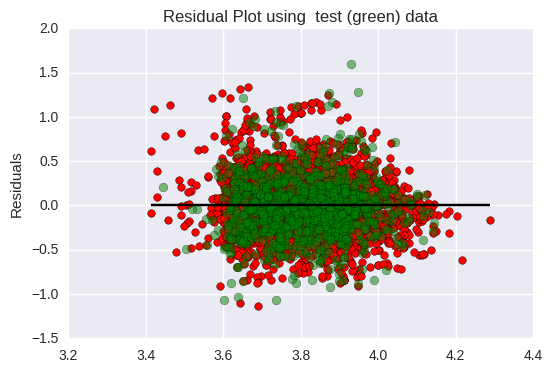

In [360]:
evaluateEstimator(XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.9,
       gamma=0, learning_rate=0.05, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=200, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=10.0,
       scale_pos_weight=1, seed=0, silent=True, subsample=1))

MSE is:  0.107315466837


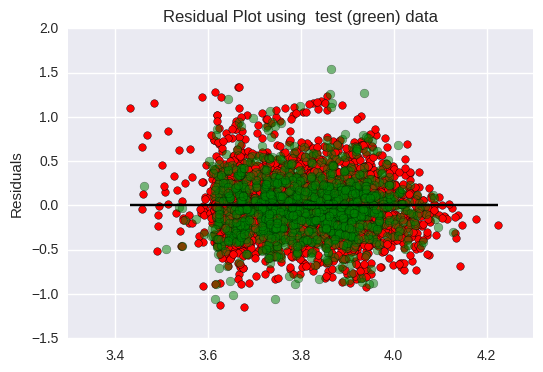

In [364]:
evaluateEstimator(XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.85,
       gamma=0.01, learning_rate=0.04, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=200, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=10.0,
       scale_pos_weight=1, seed=0, silent=True, subsample=1))

MSE is:  0.107315466837


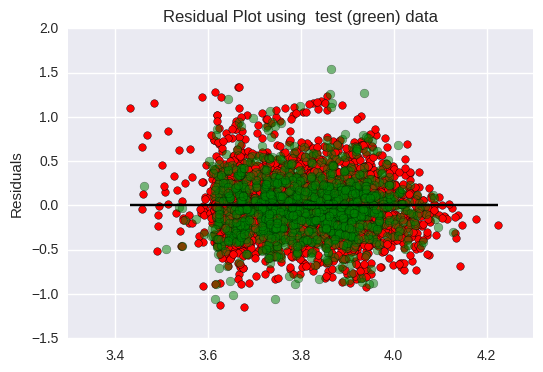

In [365]:
xgb2 = XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.85,
       gamma=0.01, learning_rate=0.04, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=200, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=10.0,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)
evaluateEstimator(xgb2)

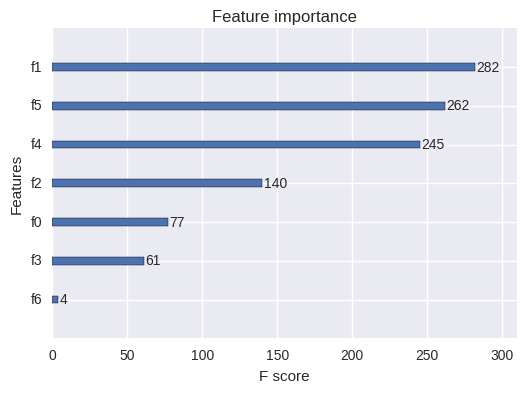

In [366]:
plot_importance(xgb2)

In [211]:
pca.components_
#'IsPoetry', 'IsDrama', 'IsEssay', 'IsFiction', 'IsCollection', 'pagesNo_log102', 'num_words_title_log', 'num_contributors_log',  'birth_to_pub_log', 'fans_count_log', 'IsIllustrated'

array([[ -9.46707383e-03,  -1.75181609e-03,   3.50189051e-04,
          2.51037490e-02,  -1.70389926e-03,   2.81972097e-02,
          2.77020863e-03,   3.96919232e-03,   1.32214102e-02,
          9.99133496e-01,   3.60869761e-03],
       [  1.64326040e-01,   3.54405660e-02,   5.71118656e-03,
         -5.57891620e-01,   7.73601182e-03,  -8.09128588e-01,
          2.89753706e-02,   2.44301623e-02,   9.14569798e-04,
          3.81010942e-02,   5.31731931e-02],
       [  3.62751971e-01,   7.54201257e-02,   2.59228779e-02,
         -7.20448107e-01,   3.14069049e-02,   5.75854484e-01,
          8.39746869e-02,   1.06872888e-02,   4.83606371e-02,
          4.65611271e-03,  -2.97349029e-02]])

In [213]:
pd.DataFrame(data=pca.components_, columns=['PC1', 'PC2', 'PC3'])  
index=['IsPoetry', 'IsDrama', 'IsEssay', 'IsFiction', 'IsCollection', 'pagesNo_log102', 'num_words_title_log', 'num_contributors_log',  'birth_to_pub_log', 'fans_count_log', 'IsIllustrated'])

SyntaxError: invalid syntax (<ipython-input-213-f290cb435b97>, line 1)

In [216]:
pca2 = PCA()
pca2.fit(np.hstack((x_t_lr, np.reshape(y_lrn, (3536, 1)) )))

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [219]:
pca2.components_

array([[ -9.36138841e-03,  -1.74932802e-03,   3.52895130e-04,
          2.49138576e-02,  -1.70211913e-03,   2.81142461e-02,
          2.81138962e-03,   3.97419594e-03,   1.32348896e-02,
          9.98774330e-01,   3.61320428e-03,   2.70756960e-02],
       [  1.75721859e-01,   3.49851212e-02,   6.15797708e-03,
         -5.66432529e-01,   7.97618985e-03,  -7.75360863e-01,
          3.47348096e-02,   2.43298319e-02,   3.93173272e-03,
          3.17990699e-02,   5.11653908e-02,   2.00806043e-01],
       [ -2.73497298e-01,  -3.80654793e-02,  -1.71813430e-02,
          4.44177538e-01,  -1.90708113e-02,  -5.55094836e-01,
         -8.49592570e-02,  -4.94977069e-03,  -4.66024343e-02,
          1.99477313e-02,   3.05367023e-02,  -6.37904873e-01],
       [  2.11265197e-01,   7.85597021e-02,   2.04712354e-02,
         -5.70085446e-01,   2.73909353e-02,   2.78346910e-01,
          8.81428477e-03,   8.88288128e-03,   1.32895302e-02,
          2.83512473e-02,  -1.26388845e-02,  -7.37736330e-01],
    

MSE is:  0.11687258643


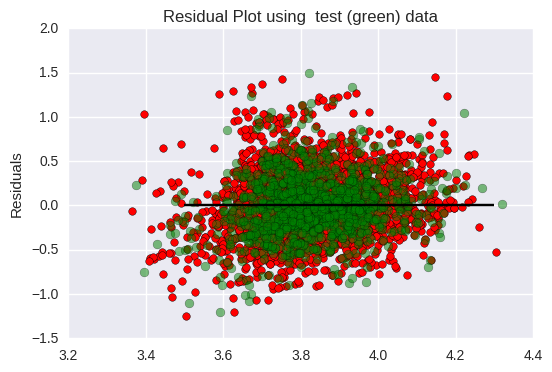

In [298]:
evaluateEstimator(RANSACRegressor())

MSE is:  0.109929929305


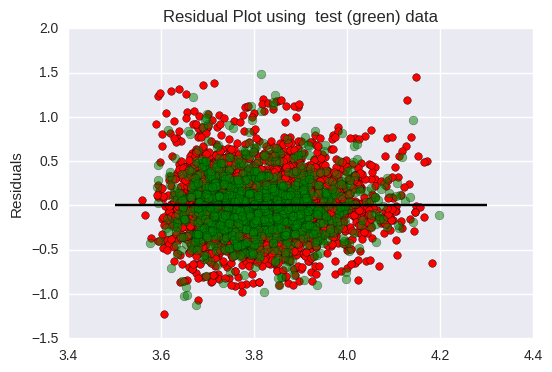

In [299]:
evaluateEstimator(lm)

In [308]:
from sklearn.feature_selection import f_regression

In [309]:
f_regression(x_t_lr, y_lrn)

(array([ 124.22908161,    2.848436  ,   52.64258745,   13.41038518,
          39.81373767,   98.7081264 ,    0.94923711]),
 array([  2.40851972e-28,   9.15579469e-02,   4.97027056e-13,
          2.54185351e-04,   3.16830484e-10,   6.14996018e-23,
          3.29985407e-01]))

## Random Forest Regressor

In [326]:
from sklearn.ensemble import RandomForestRegressor
rfregressor = RandomForestRegressor(n_estimators=300)

MSE is:  0.116783336122


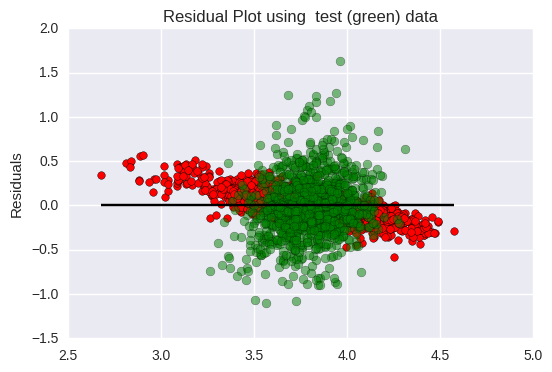

In [336]:
evaluateEstimator(rfregressor)

In [334]:
min(min(lm.predict(x_t_lr)), min(lm.predict(x_t_tst)))

3.5585850196787669

In [338]:
from sklearn.tree import DecisionTreeRegressor
dtregressor = DecisionTreeRegressor(random_state=0)

MSE is:  0.243589863014


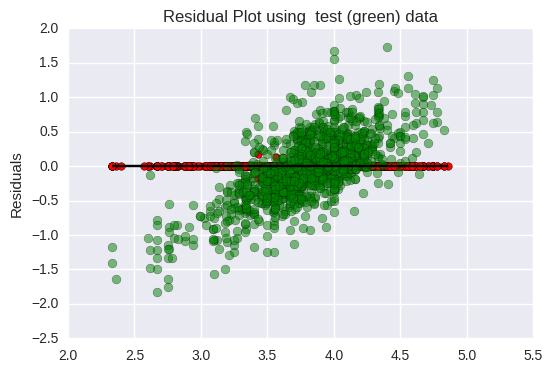

In [341]:
evaluateEstimator(dtregressor)